# <font color='red'>SGD Algorithm to predict movie ratings</font>

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

In [3]:
import os 
os.chdir('/content/drive/MyDrive/aaic (1)/RecommendationSystem_TruncatedSVD')

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [4]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [5]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [6]:
from scipy.sparse import csr_matrix
adjacency_matrix =csr_matrix((data.rating.values, (data.user_id.values,
                                              data.item_id.values)))

In [7]:
adjacency_matrix.shape

(943, 1681)

In [8]:
adjacency_matrix.toarray()

array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [10]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>code for SVD decompostion</font>

In [11]:

from sklearn.utils.extmath import randomized_svd
import numpy as np 
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=50,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 50)
(50,)
(1681, 50)


<font color='red'>Compute mean of ratings</font>

In [12]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    return ratings.mean()

In [13]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

In [15]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    return np.zeros(dim)

In [16]:
dim=adjacency_matrix.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [17]:
dim=adjacency_matrix.shape[1] # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='red'>Compute dL/db_i</font>

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

In [19]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha,b_i):
    '''In this function, we will compute dL/db_i'''
    regularization=2*alpha*b_i[user_id]
    loss=-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    total_loss=loss+regularization
    return total_loss

<font color='red'>Compute dL/dc_j</font>

In [21]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha,c_j):
    '''In this function, we will compute dL/dc_j'''

    return alpha*2*c_j-2*(rating-mu-c_j-np.dot(U[user_id],V.T[item_id]))


<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [23]:
data

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5
...,...,...,...
89987,415,813,4
89988,842,120,3
89989,574,505,2
89990,757,472,5


In [25]:
from sklearn.metrics import mean_squared_error
learning_rate=0.01
alpha=0.01
epochs=30
prediction=[]
mse=[]
y_actual=data['rating']
for epoch in range(1,epochs+1):
  prediction=[]
  for user_id,item_id,rating in zip(data['user_id'],data['item_id'],data['rating']):
    d_b=derivative_db(user_id,item_id,rating,U,VT,mu,alpha,b_i)
    b_i[user_id]=b_i[user_id]-learning_rate*d_b
    d_c=derivative_dc(user_id, item_id, rating, U, VT, mu, alpha, c_j[item_id])
    c_j[item_id]=c_j[item_id]-learning_rate*d_c
  for user_id,item_id,rating in zip(data['user_id'],data['item_id'],data['rating']):
    pred=mu+b_i[user_id]+c_j[item_id]+np.dot(U[user_id],VT.T[item_id])
    prediction.append(pred)
  mse.append(mean_squared_error(y_actual,prediction))
  print(f"epoch {epoch}: loss = {mse[-1]}")

epoch 1: loss = 0.883469065322984
epoch 2: loss = 0.858799422302942
epoch 3: loss = 0.8498069956234285
epoch 4: loss = 0.8454761037335727
epoch 5: loss = 0.843063003201758
epoch 6: loss = 0.8415841589046563
epoch 7: loss = 0.8406139323077432
epoch 8: loss = 0.8399441488693551
epoch 9: loss = 0.8394635226400652
epoch 10: loss = 0.8391082517223324
epoch 11: loss = 0.8388395875383562
epoch 12: loss = 0.8386328274992275
epoch 13: loss = 0.8384715627377638
epoch 14: loss = 0.8383445070607498
epoch 15: loss = 0.8382436651922268
epoch 16: loss = 0.838163229840099
epoch 17: loss = 0.8380988925672792
epoch 18: loss = 0.8380473987628964
epoch 19: loss = 0.8380062516745437
epoch 20: loss = 0.8379735103625262
epoch 21: loss = 0.83794764853522
epoch 22: loss = 0.8379274538720978
epoch 23: loss = 0.8379119549019296
epoch 24: loss = 0.8379003670296093
epoch 25: loss = 0.8378920521221501
epoch 26: loss = 0.837886487859948
epoch 27: loss = 0.8378832442291251
epoch 28: loss = 0.8378819653083074
epoch 29

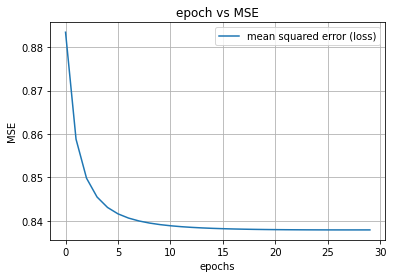

In [26]:
import matplotlib.pyplot as plt
plt.plot(mse,label='mean squared error (loss)')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('epoch vs MSE')
plt.grid()
plt.legend()
plt.show()

<br>

# <font color='red'> Task 2</font>

- For this task we have to consider the user_matrix U and the user_info.csv file.
- consider is_male columns as  output features and rest as input features. fit a model by posing this problem as binary classification task.
- apply any model like Logistic regression or Decision tree and check the performance of the model. 

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc
from seaborn import heatmap

In [28]:
user_data=pd.read_csv('user_info.csv.txt')

In [29]:
user_data

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5
...,...,...,...,...
938,938,26,0,939
939,939,32,1,940
940,940,20,1,941
941,941,48,0,942


In [30]:
X=U
y=user_data['is_male'].values

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=10)

In [32]:
model=SGDClassifier(loss='log',random_state=23)
paras={'alpha':[0.00001,0.001,0.01,0.1,1,10,100]}
clf=GridSearchCV(model,param_grid=paras,scoring='roc_auc',return_train_score=True,cv=10)

In [33]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='log', random_state=23),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc')

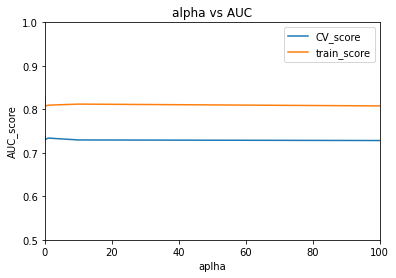

In [34]:
plt.plot(paras['alpha'],clf.cv_results_['mean_test_score'],label='CV_score')
plt.plot(paras['alpha'],clf.cv_results_['mean_train_score'],label='train_score')
plt.legend()
plt.title('alpha vs AUC')
plt.xlabel('aplha')
plt.ylabel('AUC_score')
plt.xlim(0,100)
plt.ylim(0.5,1)
plt.show()

In [35]:
best_model=clf.best_estimator_
best_model.fit(X_train,y_train)

SGDClassifier(alpha=1e-05, loss='log', random_state=23)

In [36]:
print("Accuracy on train_data {}".format(best_model.score(X_train,y_train))) #imbalanced Dataset
print("Accuracy on test_data {}".format(best_model.score(X_test,y_test)))

Accuracy on train_data 0.7468175388967468
Accuracy on test_data 0.788135593220339


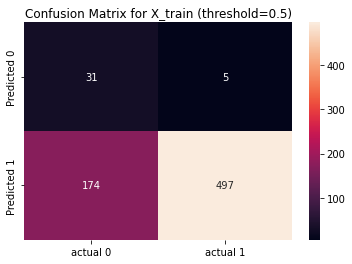

In [37]:
y_pred=best_model.predict(X_train)
temp=pd.DataFrame(confusion_matrix(y_train,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(temp,annot=True,fmt='g')
plt.title('Confusion Matrix for X_train (threshold=0.5)')
plt.show()

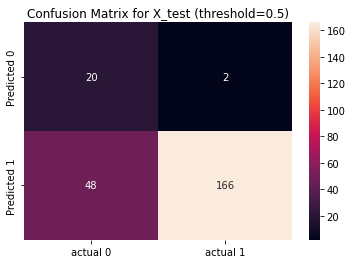

In [38]:
y_pred=best_model.predict(X_test)
temp=pd.DataFrame(confusion_matrix(y_test,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(temp,annot=True,fmt='g')
plt.title('Confusion Matrix for X_test (threshold=0.5)')
plt.show()

In [39]:
y_pred=best_model.predict_proba(X_train)
print(f"AUC score on X_train data set is {roc_auc_score(y_train,y_pred[:,1])} ")
y_pred=best_model.predict_proba(X_test)
print(f'AUC score on X_test data set is {roc_auc_score(y_test,y_pred[:,1])} ')

AUC score on X_train data set is 0.8244193955883782 
AUC score on X_test data set is 0.7635679271708684 


In [40]:
y_pred=best_model.predict_proba(X_train)
fpr,tpr,thre=roc_curve(y_train,y_pred.T[1])

In [41]:
best_threshold=thre[np.argmax(tpr*(1-fpr))]

In [42]:
def best_thre(x,t):
    return list(map(lambda x:1 if x>=t else 0,x.T[1]))

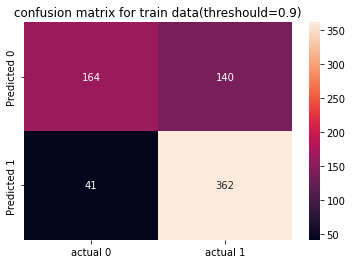

In [43]:
y_pred=best_model.predict_proba(X_train)
y_pred=best_thre(y_pred,best_threshold)
train_cm=pd.DataFrame(confusion_matrix(y_train,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(train_cm,annot=True,fmt='g')
plt.title('confusion matrix for train data(threshould={})'.format(round(best_threshold,2)))
plt.show()

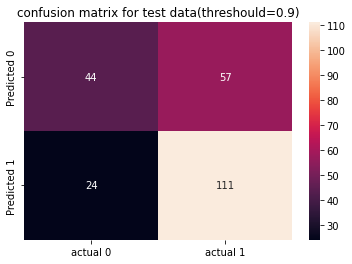

In [44]:
y_pred=best_model.predict_proba(X_test)
y_pred=best_thre(y_pred,best_threshold)
train_cm=pd.DataFrame(confusion_matrix(y_test,y_pred).T,index=['Predicted 0','Predicted 1'],columns=['actual 0','actual 1'])
heatmap(train_cm,annot=True,fmt='g')
plt.title('confusion matrix for test data(threshould={})'.format(round(best_threshold,2)))
plt.show()

Using Decomposed U matrix we got AUC score of 0.763 using logistic regression model